## SOMPO SİGORTA CASE STUDY ÇALIŞMASI - Actuarial Data Scientist / Pricing Analyst pozisyonu
### RABİA İNCİ ERYILMAZ

In [163]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Keşifci Veri Analizi

In [164]:
# Veri seti yükleme
data= pd.read_csv("Case_Study_Data.xlsx - DATA.csv")
df= data.copy()
df.head(10)

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T
5,15240,40%,8,VOLKSWAGEN,5,2019,DIZEL,İSTANBUL,BAHÇELİEVLER,63,9.121,YENİ İŞ,O,T
6,15241,0%,7,FORD,3,2021,DIZEL,İSTANBUL,SULTANBEYLİ,58,13.043,İLK DEFA SİGORTALI,O,T
7,15242,0%,5,HONDA,3,2021,BENZİN,İSTANBUL,BAŞAKŞEHİR,29,10.301,İLK DEFA SİGORTALI,O,T
8,15243,0%,7,VOLKSWAGEN,1,2023,BENZİN,İSTANBUL,BAĞCILAR,53,25.179,İLK DEFA SİGORTALI,O,T
9,15244,0%,8,TOYOTA,1,2023,BENZİN,İSTANBUL,ŞİLE,44,12.974,İLK DEFA SİGORTALI,O,T


#### Veri seti bilgisi:
| Sütun Adı                     | Açıklama                                                                                                                                           |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| TEKLİF NUMARASI                | Teklifin sistemdeki unique numarası                                                                                                               |
| HASARSIZLIK İNDİRİMİ KADEMESİ  | Müşterinin kasko hasarsızlık indirimi kademesini temsil eder. (0 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)              |
| TRAFİK BASAMAK KODU            | Müşterinin trafik hasarsızlık basamağını temsil eder. (4 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)                      |
| MARKA                          | Aracın markası                                                                                                                                   |
| ARAÇ YAŞI                      | Aracın yaşı                                                                                                                                      |
| MODEL YILI                     | Aracın model yılı                                                                                                                                |
| YAKIT TİPİ                     | Aracın yakıt tipi                                                                                                                                |
| İL                             | Sigortalının ili                                                                                                                                 |
| İLÇE                           | Sigortalının ilçesi                                                                                                                              |
| YAŞ                            | Sigortalının yaşı                                                                                                                                |
| TEKLİF PRİMİ                   | Sigortalının teklif primi                                                                                                                        |
| PORTFÖY AYRIMI                 | Poliçenin şirkette tekabül ettiği portföy alanı                                                                                                  |
| SİGORTALI TİPİ                 | Sigortalının özel - tüzel müşteri olma durumu ayrımı (**O= bireysel sigortalı, T= kurumsal sigortalı**)                                                                                            |
| TEKLİF ONAY DURUMU             | Sigortalıya sunulan teklifin onaylanma veya onaylanmama durumu (**T → Onaylanmadı, P → Onaylandı**)                                              |

##### SORULACAK SORULAR
- TRAFİK BASAMAK KODU 4 İLE BAŞLAMAK ZORUNDA MI, YOKSA 4 DURUMU İLK DEFA SİGORTALI OLANLAR İÇİN Mİ GEÇERLİ?
- KURUMSAL SİGORTALILAR İÇİN YAŞ VE İLÇE BİLGİSİ EKSİK BUNLAR KURUMSAL SİGORTALILAR İÇİN ÖNEMLİ DEĞİL Mİ?
- PORTFÖY AYRIMINDA YENİ İŞ, İLK DEFA SİGORTALI OLANLAR NE OLUYOR?
- SUNUM DOSYASINI VE KODLARI NASIL GÖNDERECEĞİZ DİREK KOD ÇALIŞMA DOSYAMIZI MI YOKSA WORDE KOD VE AÇIKLAMALARLA BERABER Mİ?

In [165]:
# Veri setine genel bakış
df.shape

(19085, 14)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEKLİF NUMARASI                19085 non-null  int64  
 1   HASARSIZLIK İNDİRİMİ KADEMESİ  19085 non-null  object 
 2   TRAFİK BASAMAK KODU            19085 non-null  int64  
 3   MARKA                          19085 non-null  object 
 4   ARAÇ YAŞI                      19085 non-null  int64  
 5   MODEL YILI                     19085 non-null  int64  
 6   YAKIT TİPİ                     19085 non-null  object 
 7   İL                             19085 non-null  object 
 8   İLÇE                           13830 non-null  object 
 9   YAŞ                            19085 non-null  int64  
 10  TEKLİF PRİMİ                   19085 non-null  float64
 11  PORTFÖY AYRIMI                 19085 non-null  object 
 12  SİGORTALI TİPİ                 19085 non-null 

In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEKLİF NUMARASI,19085.0,24910.144040,5584.407597,15235.000,20079.000,24907.000,29749.000,34570.000
TRAFİK BASAMAK KODU,19085.0,5.849044,1.410988,1.000,5.000,6.000,7.000,8.000
ARAÇ YAŞI,19085.0,2.572334,1.379313,0.000,1.000,2.000,4.000,5.000
MODEL YILI,19085.0,2021.427666,1.379313,2019.000,2020.000,2022.000,2023.000,2024.000
YAŞ,19085.0,30.695048,20.837731,0.000,0.000,36.000,47.000,64.000
TEKLİF PRİMİ,19085.0,14.393647,15.957490,2.748,8.654,11.048,15.243,646.562


Trafik basamak kodu 4 ile başlanır denmişti min 1 değeri var incelensin

In [168]:
# eksik değer kontrolü
df.isnull().sum()

TEKLİF NUMARASI                     0
HASARSIZLIK İNDİRİMİ KADEMESİ       0
TRAFİK BASAMAK KODU                 0
MARKA                               0
ARAÇ YAŞI                           0
MODEL YILI                          0
YAKIT TİPİ                          0
İL                                  0
İLÇE                             5255
YAŞ                                 0
TEKLİF PRİMİ                        0
PORTFÖY AYRIMI                      0
SİGORTALI TİPİ                      0
TEKLİF ONAY DURUMU                  0
dtype: int64

In [169]:
# "İLÇE" sütununda boş (NaN) olan satırlara bakalım
missing_ilce = df[df["İLÇE"].isnull()]
missing_ilce

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
11,15246,40%,6,MERCEDES,2,2022,DIZEL,ANKARA,NaN,0,22.488,YENİ İŞ,T,T
15,15250,30%,6,VOLKSWAGEN,2,2022,BENZİN,ANKARA,NaN,0,18.105,YENİ İŞ,T,P
16,15251,30%,4,FORD,2,2022,DIZEL,ANKARA,NaN,0,10.419,YENİ İŞ,T,T
18,15253,50%,7,FORD,3,2021,DIZEL,ANKARA,NaN,0,13.921,YENİ İŞ,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,34557,30%,5,RENAULT,1,2023,DIZEL,İSTANBUL,NaN,0,10.335,YENİ İŞ,T,T
19075,34561,0%,1,MERCEDES,5,2019,DIZEL,İSTANBUL,NaN,0,65.370,İLK DEFA SİGORTALI,T,T
19076,34562,0%,7,MERCEDES,3,2021,DIZEL,ANKARA,NaN,0,24.612,İLK DEFA SİGORTALI,T,T
19078,34564,0%,7,VOLKSWAGEN,4,2020,BENZİN,İSTANBUL,NaN,0,23.763,YENİ İŞ,T,T


In [170]:
# Her 4 kayıttan 1 nin neredeyse ilçe bilgisi eksik
# İlçe bilgisi boş olan satırları il bazında mode alıp onunla doldurucam

In [171]:
df["İLÇE"] = df.groupby("İL")["İLÇE"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "EKSİK")
)

# NaN kaldı mı kontrol edelim
nan_counts = df["İLÇE"].isna().sum()

# Örnek: İzmir satırlarını kontrol edelim
izmir_rows = df[df["İL"] == "İZMİR"].head(10)

nan_counts, izmir_rows[["İL", "İLÇE"]].head(10)

(0,
        İL        İLÇE
 3   İZMİR        BUCA
 24  İZMİR        BUCA
 27  İZMİR    GAZİEMİR
 30  İZMİR        BUCA
 42  İZMİR   KARŞIYAKA
 50  İZMİR    GAZİEMİR
 69  İZMİR       ÇİĞLİ
 71  İZMİR  KARABAĞLAR
 73  İZMİR   KARŞIYAKA
 75  İZMİR     MENEMEN)

In [172]:
df.isnull().sum()

TEKLİF NUMARASI                  0
HASARSIZLIK İNDİRİMİ KADEMESİ    0
TRAFİK BASAMAK KODU              0
MARKA                            0
ARAÇ YAŞI                        0
MODEL YILI                       0
YAKIT TİPİ                       0
İL                               0
İLÇE                             0
YAŞ                              0
TEKLİF PRİMİ                     0
PORTFÖY AYRIMI                   0
SİGORTALI TİPİ                   0
TEKLİF ONAY DURUMU               0
dtype: int64

In [173]:
# "TEKLİF NUMARASI" için tekrar eden değer kontrolü yapalım(duplicates)
tekrar_sayisi=df["TEKLİF NUMARASI"].duplicated()
tekrar_sayisi.sum()

0

In [174]:
# Hedef değişkenimizi "TEKLİF ONAY DURUMU" P=1 (onaylandı), T=0 (onaylanmadı), formatında güncelleyim böylelikle int formatı elde etmiş oluruz
# 0- 1 çevirme sebebimiz model uyumluluğunu artırmak
df["TEKLİF ONAY DURUMU"]=(df["TEKLİF ONAY DURUMU"].astype(str).str.upper()=="P").astype(int)

In [175]:
df.head(20)

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,0
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,0
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,0
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,BUCA,0,17.733,YENİ İŞ,T,0
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,0
5,15240,40%,8,VOLKSWAGEN,5,2019,DIZEL,İSTANBUL,BAHÇELİEVLER,63,9.121,YENİ İŞ,O,0
6,15241,0%,7,FORD,3,2021,DIZEL,İSTANBUL,SULTANBEYLİ,58,13.043,İLK DEFA SİGORTALI,O,0
7,15242,0%,5,HONDA,3,2021,BENZİN,İSTANBUL,BAŞAKŞEHİR,29,10.301,İLK DEFA SİGORTALI,O,0
8,15243,0%,7,VOLKSWAGEN,1,2023,BENZİN,İSTANBUL,BAĞCILAR,53,25.179,İLK DEFA SİGORTALI,O,0
9,15244,0%,8,TOYOTA,1,2023,BENZİN,İSTANBUL,ŞİLE,44,12.974,İLK DEFA SİGORTALI,O,0


In [176]:
# şimdi Teklif onay durumu sütunun kendi içindeki oranına bakalım
class_counts = df["TEKLİF ONAY DURUMU"].value_counts(dropna=False) \
                 .rename_axis("ONAY_DURUMU").reset_index(name="Adet")
class_counts["Oran (%)"] = (class_counts["Adet"] / len(df) * 100).round(2)

class_counts

,ONAY_DURUMU,Adet,Oran (%)
0,0,16711,87.56
1,1,2374,12.44


Teklif onay durumuna baktığımızda dağılım dengesiz bu yüzden accuracy yanılabilir, model seçiminde buna dikkat edilmeli

In [177]:
# Model yılı- Araç yaşı sütunları kontrolü 2025 yılı referans alınarak
fark = 2025 - df["MODEL YILI"]
kontrol_2025 = fark == df["ARAÇ YAŞI"]   # True/False seri
kontrol_2025.all()  # hepsi eşit mi?


False

In [178]:
# 2024 yılı baz alınarak
fark = 2024 - df["MODEL YILI"]
kontrol_2024 = fark == df["ARAÇ YAŞI"]   # True/False seri
kontrol_2024.all()  # hepsi eşit mi?


True

Sonuç: 2024 yılına dayalı bir veri seti ve model yılı ile araç yaşı sütunları tam eşleşme gösterdiğinden veri setinde sadece bir sütun kullanılabilir. Modelde gereksiz karmaşıklık çıkarmaması adına

In [179]:
df = df.drop(columns=["MODEL YILI"])

# Kalan sütunları kontrol edelim
df.columns.tolist()

['TEKLİF NUMARASI',
 'HASARSIZLIK İNDİRİMİ KADEMESİ',
 'TRAFİK BASAMAK KODU',
 'MARKA',
 'ARAÇ YAŞI',
 'YAKIT TİPİ',
 'İL',
 'İLÇE',
 'YAŞ ',
 'TEKLİF PRİMİ',
 'PORTFÖY AYRIMI',
 'SİGORTALI TİPİ',
 'TEKLİF ONAY DURUMU']

In [180]:
# İndirim yüzdesi müşterinin risk profili ve hasar kaydıyla ilişkisi olabilir ondan sayısal formata çeviriyorum
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"].str.replace("%","").astype(float)
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"] / 100

In [181]:
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,0
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,0
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,0
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,BUCA,0,17.733,YENİ İŞ,T,0
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,0


#### Portföy ayrımına göre trafik basamak kodu ve hasarsızlık indirimi kademesi ayarlaması için
- İlk defa sigortalı = Trafik basamak kodu 4, hasarsızlık indirimi %0.
- Yeni iş = Başka şirketten devrolan basamak kodu + indirim taşır.
- Yenileme = Mevcut şirket içindeki basamak kodu + indirim güncellenir.
- Sıfır araç = Eğer sürücü önceden başka aracında sigortalıysa eski basamak korunur.

In [182]:
# İlk defa sigortalı olanların trafik basamak kodunu 4 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "TRAFİK BASAMAK KODU"] = 4

# İlk defa sigortalı olanların hasarsızlık indirim kademesini 0 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "HASARSIZLIK İNDİRİMİ KADEMESİ"] = 0
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,0
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,0
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,0
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,BUCA,0,17.733,YENİ İŞ,T,0
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,0


In [183]:
# İlk defa sigortalı olan ve trafik basamak kodu 4 olmayanlar
hatalilar_trafik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["TRAFİK BASAMAK KODU"] != 4)
]

# İlk defa sigortalı olan ve hasarsızlık indirimi kademesi 0 olmayanlar
hatalilar_hasarsizlik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["HASARSIZLIK İNDİRİMİ KADEMESİ"] != 0)
]

(len(hatalilar_trafik), len(hatalilar_hasarsizlik))

(0, 0)

In [184]:
# 1) Sütun adlarındaki boşlukları temizle
df.columns = df.columns.str.strip()

# 2) 'YAŞ' sütununu adındaki farklılıklara rağmen yakala
col_yas = df.filter(regex=r'(?i)^ya[sş]\b').columns[0]  # YAŞ / Yaş / YAS / YAŞ   hepsini yakalar

# 3) YAŞ < 18 olanları getir
mask = pd.to_numeric(df[col_yas], errors='coerce') < 18
df_18alt = df.loc[mask]

print("YAŞ < 18 adet:", mask.sum())
df_18alt.head(10)


YAŞ < 18 adet: 5255


,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,BUCA,0,17.733,YENİ İŞ,T,0
11,15246,0.4,6,MERCEDES,2,DIZEL,ANKARA,ÇANKAYA,0,22.488,YENİ İŞ,T,0
15,15250,0.3,6,VOLKSWAGEN,2,BENZİN,ANKARA,ÇANKAYA,0,18.105,YENİ İŞ,T,1
16,15251,0.3,4,FORD,2,DIZEL,ANKARA,ÇANKAYA,0,10.419,YENİ İŞ,T,0
18,15253,0.5,7,FORD,3,DIZEL,ANKARA,ÇANKAYA,0,13.921,YENİ İŞ,T,1
19,15254,0.0,7,MERCEDES,4,BENZİN,ANKARA,ÇANKAYA,0,17.738,YENİ İŞ,T,0
21,15256,0.6,8,VOLKSWAGEN,3,BENZİN,İSTANBUL,BAŞAKŞEHİR,0,9.907,YENİ İŞ,T,0
24,15259,0.3,8,VOLKSWAGEN,1,BENZİN,İZMİR,BUCA,0,14.105,YENİ İŞ,T,0
25,15260,0.3,5,FORD,1,DIZEL,İSTANBUL,BAŞAKŞEHİR,0,12.368,YENİ İŞ,T,0
29,15264,0.6,7,FORD,4,BENZİN,İSTANBUL,BAŞAKŞEHİR,0,7.183,YENİ İŞ,T,1


In [185]:
x=int(((df["YAŞ"].astype(float) < 18) & df["SİGORTALI TİPİ"].eq("T")).sum()) # kurumsal sigortlı yaşı 18 den küçük kaç kişi var
y=int(((df["YAŞ"].astype(float) < 18) & df["SİGORTALI TİPİ"].eq("O")).sum()) # bireysel sigortalı yaşı 18 den küçük kaç kişi var
print(x)
print(y)
z=int(((df["YAŞ"].astype(float) < 1) & df["SİGORTALI TİPİ"].eq("T")).sum()) # kurumsal sigortalı yaşı 0 olan kaç kişi var
print(z)
w=int(((df["YAŞ"].astype(float) > 18) & df["SİGORTALI TİPİ"].eq("T")).sum()) # kurumsal sigortalı yaşı 18 den büyük kaç kişi var
print(w)

5255
0
5255
0


- Sigortalı tipi kurumsal olan satırların Yaş Bilgisi = 0, yani kurumsal sigortalılarda yaş bilgisinin önemi yok diye yorumluyorum.

In [186]:
# 1) Yaş sütunundaki kurumsal olanları tespit et (yaş=0 ise kurumsal)
df["KURUMSAL_MI"] = (df["YAŞ"] == 0).astype(int)

# 2) Sadece bireysel müşterilerin (kurumsal olmayan) yaş ortalamasını hesapla
ortalama_yas = df.loc[df["KURUMSAL_MI"] == 0, "YAŞ"].mean()

# 3) Yaşı 0 olan (kurumsal) satırlarda yaş değerini bireysel ortalama ile değiştir
df.loc[df["YAŞ"] == 0, "YAŞ"] = ortalama_yas

# 4) Kontrol için ilk birkaç satırı göster
print(df[["YAŞ", "KURUMSAL_MI"]].head(15))

          YAŞ  KURUMSAL_MI
0   29.000000            0
1   41.000000            0
2   43.000000            0
3   42.358279            1
4   43.000000            0
5   63.000000            0
6   58.000000            0
7   29.000000            0
8   53.000000            0
9   44.000000            0
10  28.000000            0
11  42.358279            1
12  32.000000            0
13  49.000000            0
14  48.000000            0


C:\Users\incie\AppData\Local\Temp\ipykernel_16204\3528880318.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '42.35827910339841' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["YAŞ"] == 0, "YAŞ"] = ortalama_yas


In [187]:
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU,KURUMSAL_MI
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29.000000,18.743,YENİLEME,O,0,0
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41.000000,13.778,YENİ İŞ,O,0,0
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43.000000,7.814,YENİ İŞ,O,0,0
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,BUCA,42.358279,17.733,YENİ İŞ,T,0,1
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43.000000,10.306,YENİ İŞ,O,0,0


- Yaş=0 olanlar için bireysel sigortalıların yaş ortalaması ile kurumsal sigortalıların yaş bilgisini güncelleyip, kurumsal_mı sütunu ile flag ekledim.

In [188]:
df.isnull().sum()

TEKLİF NUMARASI                  0
HASARSIZLIK İNDİRİMİ KADEMESİ    0
TRAFİK BASAMAK KODU              0
MARKA                            0
ARAÇ YAŞI                        0
YAKIT TİPİ                       0
İL                               0
İLÇE                             0
YAŞ                              0
TEKLİF PRİMİ                     0
PORTFÖY AYRIMI                   0
SİGORTALI TİPİ                   0
TEKLİF ONAY DURUMU               0
KURUMSAL_MI                      0
dtype: int64

In [189]:
# Teklif Primi sütunu için değer aralıklarına bakalım
# 100’lük aralıklarla gruplama
max_val = int(df["TEKLİF PRİMİ"].max())   # float → int dönüşümü
bins = list(range(0, max_val + 100, 100))
labels = [f"{i}-{i+100}" for i in bins[:-1]]

# Yeni sütun eklemeden sadece geçici seride aralıkları oluştur
prim_aralik = pd.cut(df["TEKLİF PRİMİ"], bins=bins, labels=labels, right=False)

pivot = prim_aralik.value_counts().sort_index()

# DataFrame formatında görmek için
pivot_df = pivot.reset_index()
pivot_df.columns = ["Prim Aralık", "Frekans"]

print(pivot_df)

  Prim Aralık  Frekans
0       0-100    18980
1     100-200       84
2     200-300       14
3     300-400        4
4     400-500        2
5     500-600        0
6     600-700        1


In [190]:
# Aykırı değerlerin modele katsayı olarak etkisini azaltmak için log dönüşüm yaptım. Yani 10 ile 100 arasında 10 katlık bir fark var ama log dönüşümden sonra yaklaşık 2.22 bir fark olacaktır.
# Bu de linner, lojistik regresyon modellerinde yanlılığı önleyecektir. Ağaç tabanlı modellerde böyle bir şeye her zaman ihtiyaç olmayabiliyor.
# Teklif primini log dönüşüme sokalım
df["TEKLIF_PRIMI_LOG"] = np.log1p(df["TEKLİF PRİMİ"])

# İlk 5 satıra bakalım
print(df[["TEKLİF PRİMİ", "TEKLIF_PRIMI_LOG"]].head())
df = df.drop(columns=["TEKLİF PRİMİ"])

   TEKLİF PRİMİ  TEKLIF_PRIMI_LOG
0        18.743          2.982799
1        13.778          2.693140
2         7.814          2.176341
3        17.733          2.930287
4        10.306          2.425334


In [191]:
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU,KURUMSAL_MI,TEKLIF_PRIMI_LOG
0,15235,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29.000000,YENİLEME,O,0,0,2.982799
1,15236,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41.000000,YENİ İŞ,O,0,0,2.693140
2,15237,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43.000000,YENİ İŞ,O,0,0,2.176341
3,15238,0.3,5,RENAULT,1,DIZEL,İZMİR,BUCA,42.358279,YENİ İŞ,T,0,1,2.930287
4,15239,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43.000000,YENİ İŞ,O,0,0,2.425334


## BİREYSEL SİGORTALILAR İÇİN GÖRSELLEŞTİRMELER

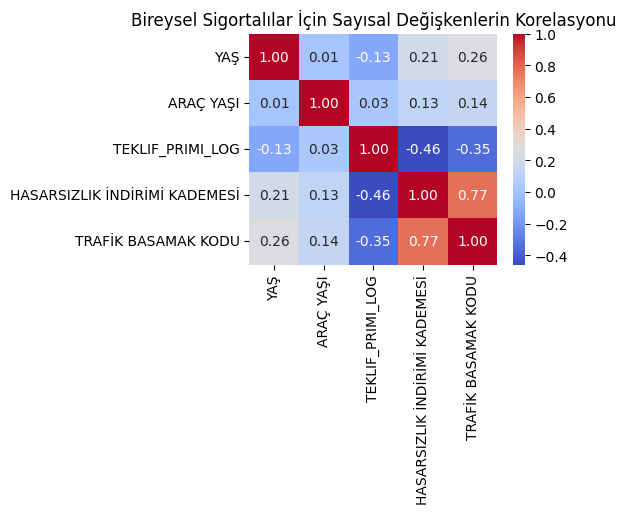

In [192]:
df_bireysel = df[df["KURUMSAL_MI"] == 0]
plt.figure(figsize=(4,3))
sns.heatmap(
    df_bireysel[["YAŞ","ARAÇ YAŞI","TEKLIF_PRIMI_LOG",
                 "HASARSIZLIK İNDİRİMİ KADEMESİ","TRAFİK BASAMAK KODU"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Bireysel Sigortalılar İçin Sayısal Değişkenlerin Korelasyonu")
plt.show()



Korelasyon Isı Haritası (Bireysel Sigortalılar):
- Yaş ile Teklif Primi Log arasında çok düşük (negatif) bir korelasyon var (-0.13). Yani yaş arttıkça primlerde belirgin bir düşüş yok, çok zayıf bir ilişki var.
- Hasarsızlık İndirimi Kademesi ile Trafik Basamak Kodu arasında çok güçlü pozitif korelasyon (0.77). Bu beklenen bir durum çünkü bu iki değişken aynı sistem üzerinden hesaplanıyor.
- Teklif Primi Log ile Hasarsızlık İndirimi Kademesi (-0.46) ve Trafik Basamak Kodu (-0.35) arasında negatif ilişki var. Yani basamak/kademe yükseldikçe teklif primi düşüyor.

Yorum: Bireysel müşterilerde prim üzerinde en belirgin etkiye sahip değişken hasarsızlık indirimi kademesi ve trafik basamak kodu.

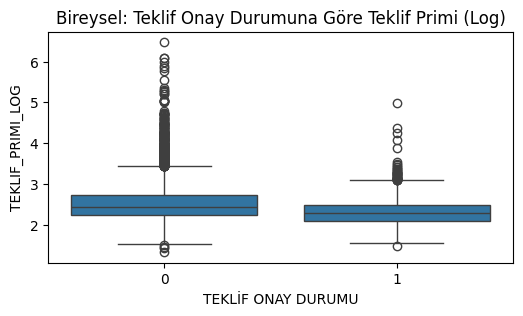

In [193]:
plt.figure(figsize=(6,3))
sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLIF_PRIMI_LOG", data=df_bireysel)
plt.title("Bireysel: Teklif Onay Durumuna Göre Teklif Primi (Log)")
plt.show()

Boxplot (Teklif Onay Durumuna Göre Teklif Primi):
- Onaylanan (1) tekliflerin primleri, onaylanmayanlara (0) göre biraz daha düşük görünüyor.
- Özellikle yüksek primlerde (outlier’lar) onaylama oranı oldukça düşük.
- Onaylanan tekliflerde prim dağılımı daha dar, yani daha makul seviyelerde.

Yorum: Teklif priminin yüksek olması, onaylanmama ihtimalini artırıyor.

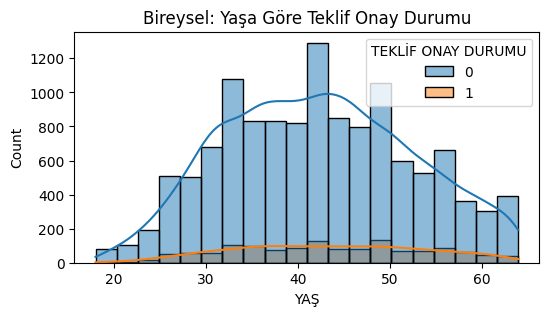

In [194]:
plt.figure(figsize=(6,3))
sns.histplot(data=df_bireysel, x="YAŞ", hue="TEKLİF ONAY DURUMU", bins=20, kde=True)
plt.title("Bireysel: Yaşa Göre Teklif Onay Durumu")
plt.show()

Histogram (Yaşa Göre Teklif Onay Durumu):
- Müşterilerin büyük çoğunluğu 30-50 yaş aralığında.
- Onaylanan teklifler (turuncu) tüm yaş gruplarında çok düşük.
- Yaş arttıkça onaylama olasılığında belirgin bir artış ya da azalış yok.

Yorum: Yaş, teklif onayını belirlemede çok güçlü bir faktör değil. Ama müşteri dağılımının merkezi yaş grubunda yoğun olduğunu gösteriyor.

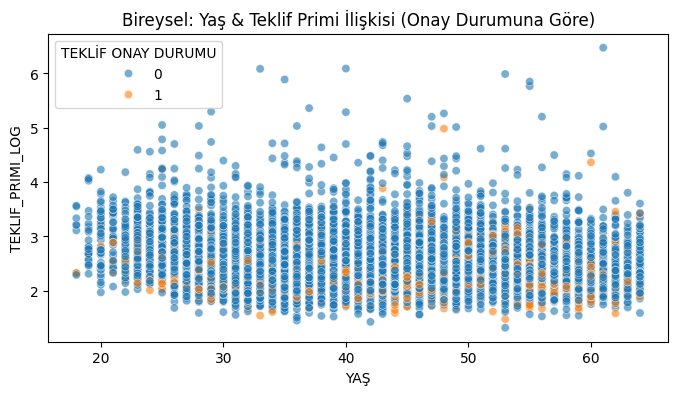

In [195]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=df_bireysel, 
    x="YAŞ", y="TEKLIF_PRIMI_LOG", hue="TEKLİF ONAY DURUMU", alpha=0.6
)
plt.title("Bireysel: Yaş & Teklif Primi İlişkisi (Onay Durumuna Göre)")
plt.show()

Scatter Plot (Yaş & Teklif Primi İlişkisi, Onay Durumuna Göre):
- Primler tüm yaşlarda benzer seviyelerde dağılmış.
- Onaylanan teklifler (turuncu noktalar) genellikle daha düşük primli tekliflerde yoğunlaşıyor.
- Yaş ile teklif primi arasında güçlü bir desen görünmüyor.

Yorum: Teklif onaylanma durumunu daha çok prim düzeyi etkiliyor, yaş faktörü tek başına belirleyici değil.

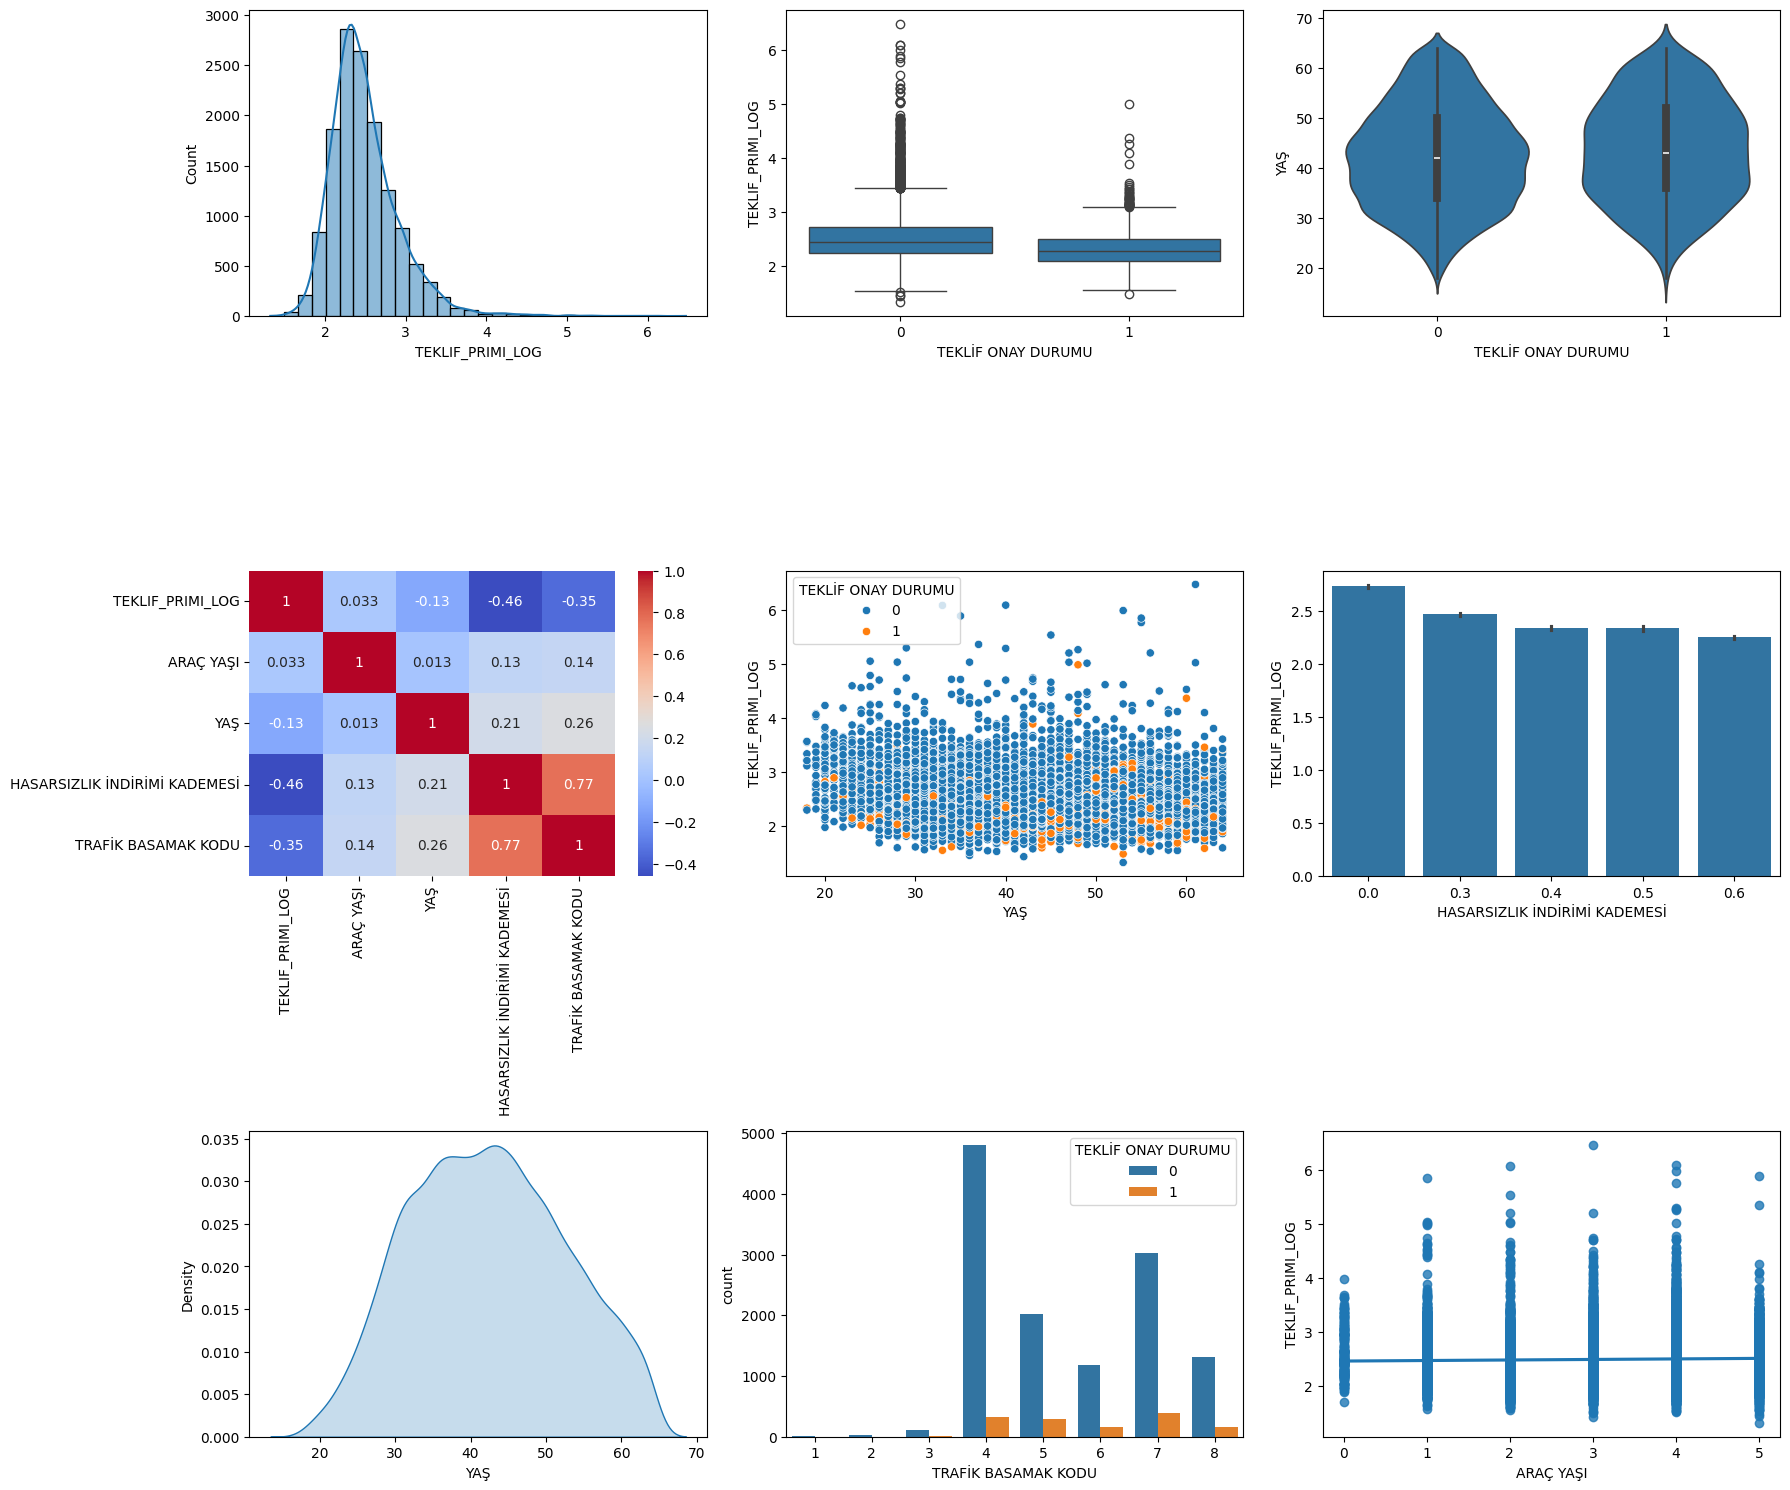

In [214]:
# Sadece bireysel müşteriler (örnek: kurumsal olmayanlar)
df_bireysel = df[df["KURUMSAL_MI"] == 0]

# 3x3 boyutlu subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Görselleştirme fonksiyonları
plots = [
    lambda ax: sns.histplot(data=df_bireysel, x="TEKLIF_PRIMI_LOG", bins=30, kde=True, ax=ax),
    lambda ax: sns.boxplot(data=df_bireysel, x="TEKLİF ONAY DURUMU", y="TEKLIF_PRIMI_LOG", ax=ax),
    lambda ax: sns.violinplot(data=df_bireysel, x="TEKLİF ONAY DURUMU", y="YAŞ", ax=ax),
    lambda ax: sns.heatmap(df_bireysel[["TEKLIF_PRIMI_LOG","ARAÇ YAŞI","YAŞ","HASARSIZLIK İNDİRİMİ KADEMESİ","TRAFİK BASAMAK KODU"]].corr(),
                           annot=True, cmap="coolwarm", ax=ax),
    lambda ax: sns.scatterplot(data=df_bireysel, x="YAŞ", y="TEKLIF_PRIMI_LOG", hue="TEKLİF ONAY DURUMU", ax=ax),
    lambda ax: sns.barplot(data=df_bireysel, x="HASARSIZLIK İNDİRİMİ KADEMESİ", y="TEKLIF_PRIMI_LOG", ax=ax),
    lambda ax: sns.kdeplot(data=df_bireysel, x="YAŞ", ax=ax, fill=True),
    lambda ax: sns.countplot(data=df_bireysel, x="TRAFİK BASAMAK KODU", hue="TEKLİF ONAY DURUMU", ax=ax),
    lambda ax: sns.regplot(data=df_bireysel, x="ARAÇ YAŞI", y="TEKLIF_PRIMI_LOG", ax=ax),
]

# Subplotlara çizim
for ax, plot in zip(axes.flatten(), plots):
    plot(ax)

plt.tight_layout()
plt.show()

## KURUMSAL SİGORTALILAR İÇİN GÖRSELLEŞTİRMELER

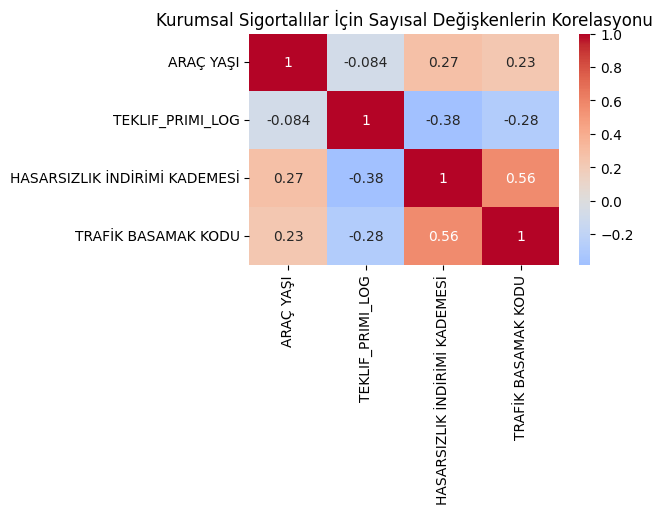

In [196]:
# Kurumsal filtre
df_kurumsal = df[df["KURUMSAL_MI"] == 1]

# Sadece gerekli sayısal değişkenler
num_cols_kurumsal = ["ARAÇ YAŞI", "TEKLIF_PRIMI_LOG", 
                     "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr = df_kurumsal[num_cols_kurumsal].corr()

plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Kurumsal Sigortalılar İçin Sayısal Değişkenlerin Korelasyonu", fontsize=12)
plt.show()

Korelasyon Isı Haritası:
- Araç Yaşı, Hasarsızlık İndirimi Kademesi (0.27) ve Trafik Basamak Kodu (0.23) ile pozitif ilişkili. Araç yaşlandıkça kademe ve basamak kodu artabiliyor.
- Teklif Primi (Log), hem Hasarsızlık İndirimi Kademesi (-0.38) hem de Trafik Basamak Kodu (-0.28) ile negatif ilişkili. Yani kademesi/basamak kodu iyi olan kurumsal müşteriler daha düşük prim alıyor.
- Hasarsızlık İndirimi Kademesi ile Trafik Basamak Kodu arasında orta düzeyde (0.56) bir pozitif ilişki var. Yani bu iki değişken birbirini destekliyor.

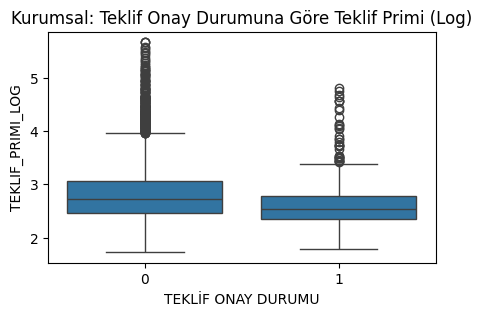

In [197]:
plt.figure(figsize=(5,3))
sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLIF_PRIMI_LOG", data=df_kurumsal)
plt.title("Kurumsal: Teklif Onay Durumuna Göre Teklif Primi (Log)")
plt.show()

Teklif Onay Durumuna Göre Teklif Primi (Log):
- Onaylanmayan teklifler (0) genelde biraz daha yüksek prim aralığında dağılmış durumda.
- Onaylanan teklifler (1) görece daha düşük primlerde yoğunlaşıyor.
- Yani prim büyüklüğü kurumsal müşterilerde de teklif onayını etkiliyor.

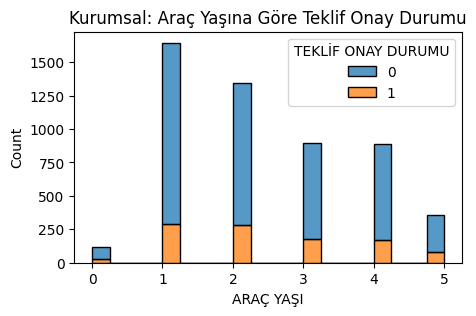

In [198]:
plt.figure(figsize=(5,3))
sns.histplot(data=df_kurumsal, x="ARAÇ YAŞI", hue="TEKLİF ONAY DURUMU", 
             multiple="stack", kde=False, bins=20)
plt.title("Kurumsal: Araç Yaşına Göre Teklif Onay Durumu")
plt.show()


Araç Yaşına Göre Teklif Onay Durumu:
- 1-2 yaşındaki araçlarda teklif yoğunluğu yüksek ve onaylanan teklif sayısı da bu grupta daha fazla.
- 3 yaş ve üzerindeki araçlarda hem toplam teklif sayısı düşüyor hem de onay oranı azalıyor.
- Bu da kurumsal sigortalılar için yeni araçların sigortalanmasının daha kolay onaylandığını gösteriyor.

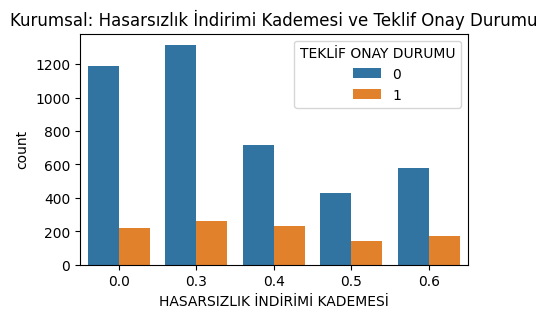

In [199]:
plt.figure(figsize=(5,3))
sns.countplot(x="HASARSIZLIK İNDİRİMİ KADEMESİ", hue="TEKLİF ONAY DURUMU", data=df_kurumsal)
plt.title("Kurumsal: Hasarsızlık İndirimi Kademesi ve Teklif Onay Durumu")
plt.show()

Hasarsızlık İndirimi Kademesi ve Teklif Onay Durumu:
- Kademe 0.0 ve 0.3 seviyelerinde yoğunluk çok yüksek, ancak onay sayıları görece az.
- Orta seviye kademelerde (0.4–0.6) teklif sayısı azalıyor ama onay oranı nispeten daha dengeli.
- Yani kademesi çok düşük olanlar çok teklif alıyor ama çoğu reddediliyor.

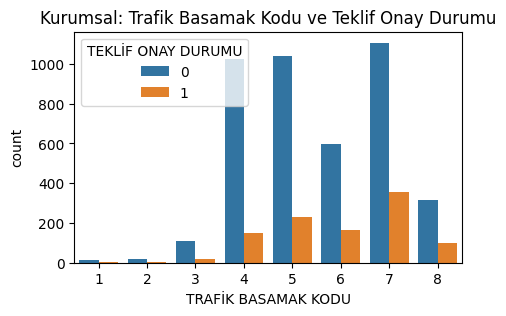

In [200]:
plt.figure(figsize=(5,3))
sns.countplot(x="TRAFİK BASAMAK KODU", hue="TEKLİF ONAY DURUMU", data=df_kurumsal)
plt.title("Kurumsal: Trafik Basamak Kodu ve Teklif Onay Durumu")
plt.show()

Trafik Basamak Kodu ve Teklif Onay Durumu:
- En yoğunluk basamak 4, 5, 6 ve 7’de.
- Basamak 4-5’te onay sayısı fena değil, ama çoğu reddediliyor.
- Basamak 7’de onay sayısının daha fazla olması dikkat çekici; iyi sürücü geçmişine sahip kurumsal müşterilerin teklifleri daha çok onaylanıyor.
- 1-2 gibi düşük basamaklarda hem teklif sayısı hem onay düşük.

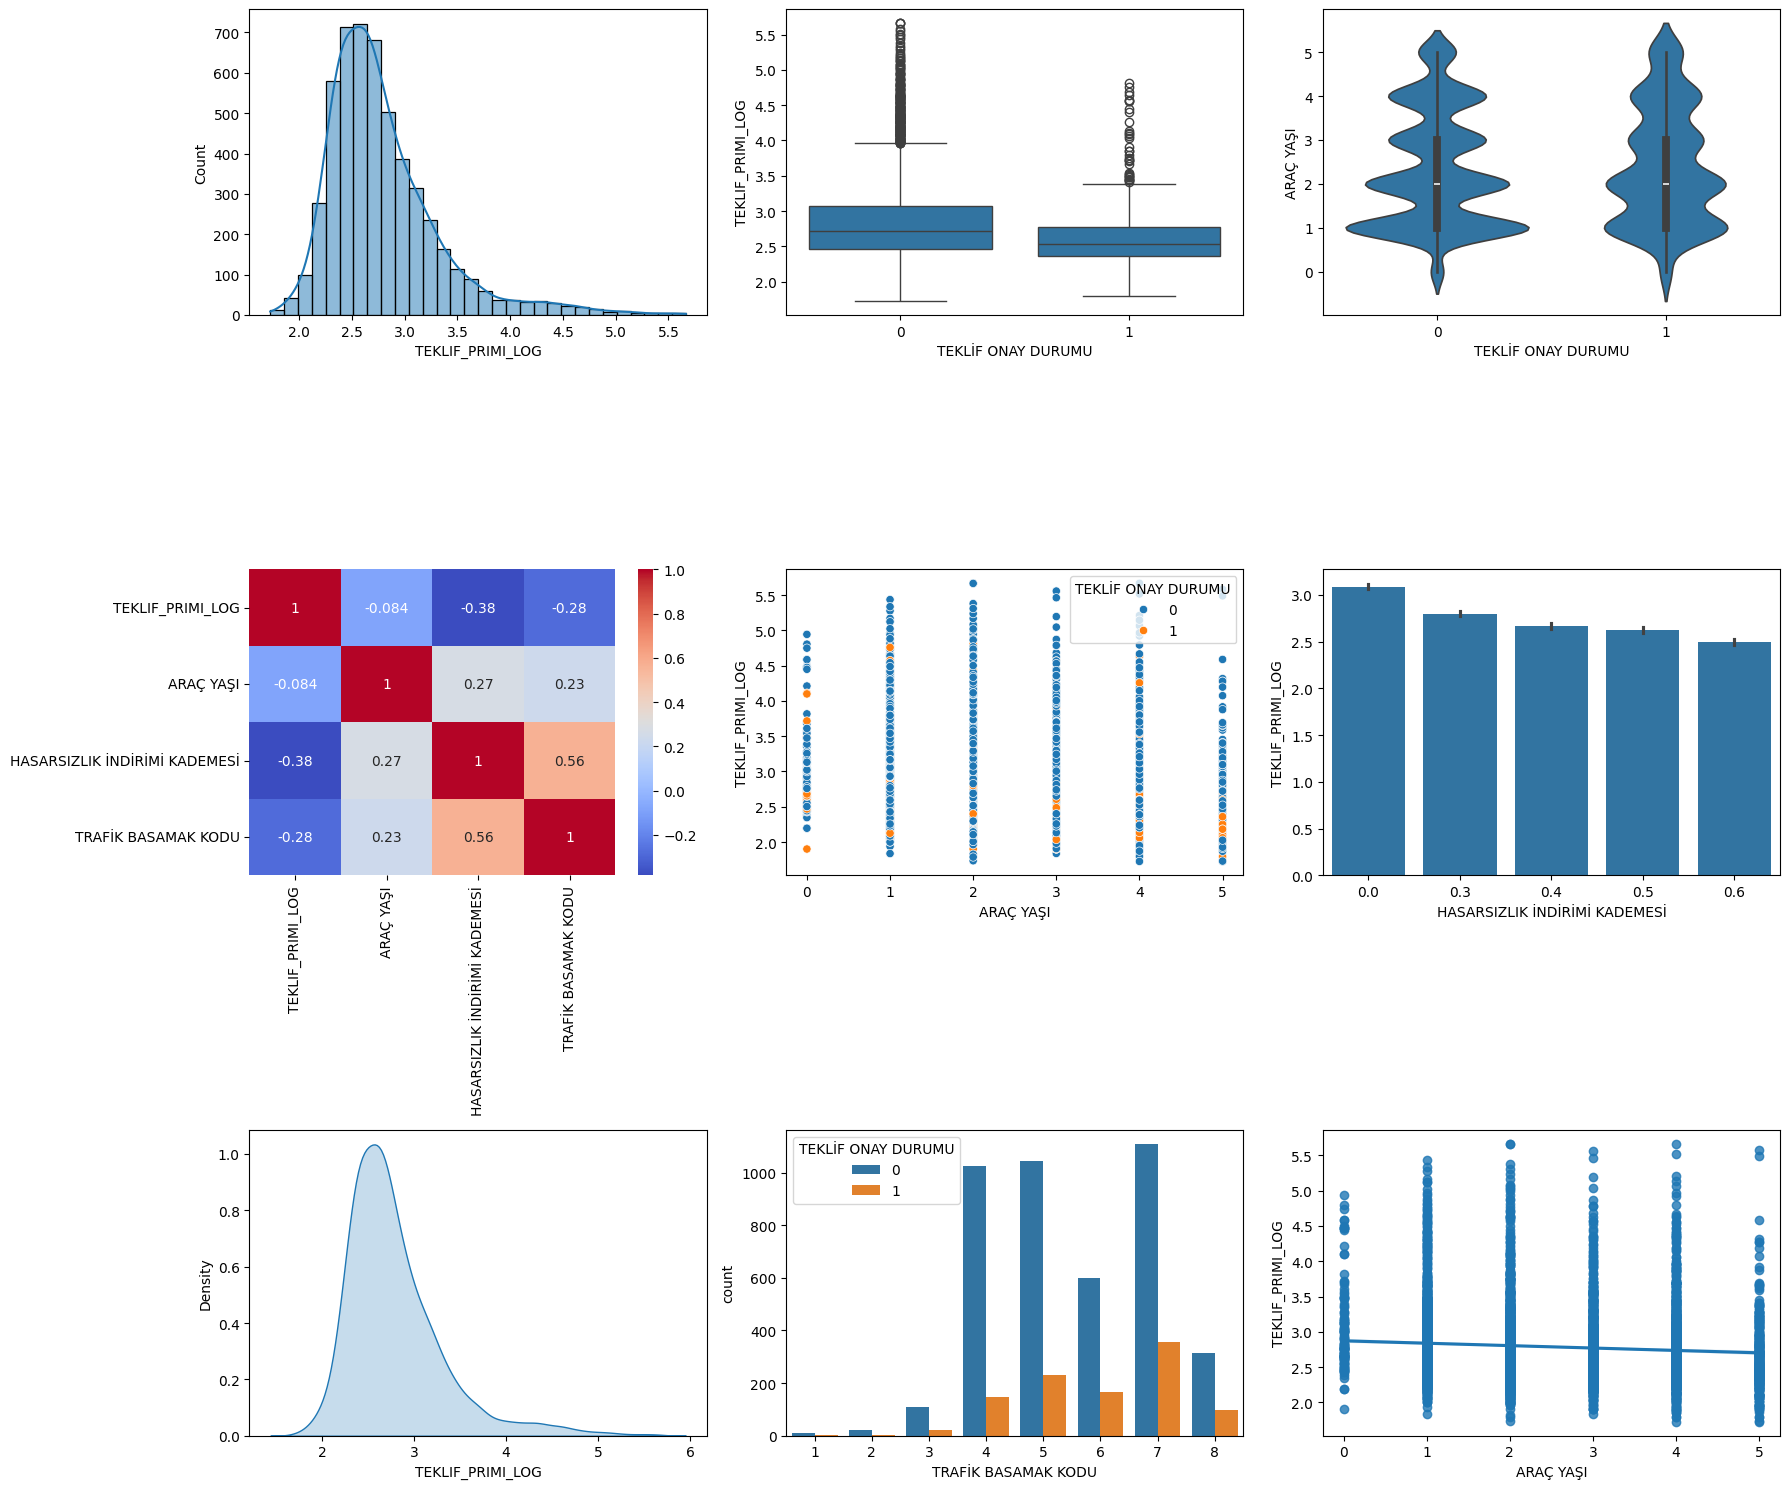

In [215]:
# Sadece kurumsal müşteriler
df_kurumsal = df[df["KURUMSAL_MI"] == 1]

# 3x3 boyutlu subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Görselleştirme fonksiyonları (yaş yok!)
plots = [
    lambda ax: sns.histplot(data=df_kurumsal, x="TEKLIF_PRIMI_LOG", bins=30, kde=True, ax=ax),
    lambda ax: sns.boxplot(data=df_kurumsal, x="TEKLİF ONAY DURUMU", y="TEKLIF_PRIMI_LOG", ax=ax),
    lambda ax: sns.violinplot(data=df_kurumsal, x="TEKLİF ONAY DURUMU", y="ARAÇ YAŞI", ax=ax),
    lambda ax: sns.heatmap(df_kurumsal[["TEKLIF_PRIMI_LOG","ARAÇ YAŞI","HASARSIZLIK İNDİRİMİ KADEMESİ","TRAFİK BASAMAK KODU"]].corr(),
                           annot=True, cmap="coolwarm", ax=ax),
    lambda ax: sns.scatterplot(data=df_kurumsal, x="ARAÇ YAŞI", y="TEKLIF_PRIMI_LOG", hue="TEKLİF ONAY DURUMU", ax=ax),
    lambda ax: sns.barplot(data=df_kurumsal, x="HASARSIZLIK İNDİRİMİ KADEMESİ", y="TEKLIF_PRIMI_LOG", ax=ax),
    lambda ax: sns.kdeplot(data=df_kurumsal, x="TEKLIF_PRIMI_LOG", ax=ax, fill=True),
    lambda ax: sns.countplot(data=df_kurumsal, x="TRAFİK BASAMAK KODU", hue="TEKLİF ONAY DURUMU", ax=ax),
    lambda ax: sns.regplot(data=df_kurumsal, x="ARAÇ YAŞI", y="TEKLIF_PRIMI_LOG", ax=ax),
]

# Subplotlara çizim
for ax, plot in zip(axes.flatten(), plots):
    plot(ax)

plt.tight_layout()
plt.show()

### DİĞER GÖRSELLEŞTİRMELER

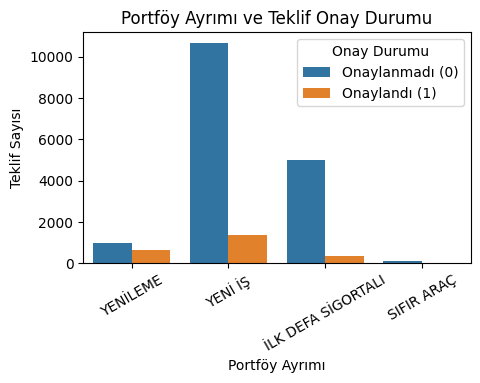

In [202]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="PORTFÖY AYRIMI", hue="TEKLİF ONAY DURUMU")
plt.title("Portföy Ayrımı ve Teklif Onay Durumu")
plt.xlabel("Portföy Ayrımı")
plt.ylabel("Teklif Sayısı")
plt.xticks(rotation=30)
plt.legend(title="Onay Durumu", labels=["Onaylanmadı (0)", "Onaylandı (1)"])
plt.show()

Yenileme (Mevcut müşterinin poliçesini yenilemesi):
- Onay sayısı ile reddedilme sayısı neredeyse birbirine yakın.
- Bu, mevcut müşteriler için şirketin daha denge politikası izlediğini gösteriyor.
- Ama yine de reddedilme sayısı daha fazla → yani sadakat avantaj sağlasa da tek başına garanti değil.
  
Yeni İş (Başka sigorta şirketinden buraya gelen müşteri):
- Açık ara en büyük müşteri kitlesi.
- Fakat reddedilme oranı çok yüksek.
- Buradan şu çıkarım yapılabilir: Şirket, yeni gelen müşterilerden yüksek risk gördüklerini seçiyor ve çok sayıda teklifi reddediyor.

İlk Defa Sigortalı (Hayatında ilk kez sigorta yaptırıyor):
- Teklif onay sayısı oldukça düşük.
- Bu grup, şirket için en riskli çünkü geçmiş verisi yok.
- Doğal olarak tekliflerin çoğu reddedilmiş.

Sıfır Araç (Müşteri daha önce sigortalı olabilir ama yeni aracı var):
- Sayısı çok az.
- Bu grupta da reddedilme oranı yüksek.
- Yeni araç genellikle daha yüksek prim demek → kabul oranı düşük çıkmış olabilir.

In [203]:
# Pivot tablo: Portföy Ayrımı & Teklif Onay Durumu
pivot = pd.pivot_table(
    df,
    values="TEKLİF NUMARASI",
    index="PORTFÖY AYRIMI",
    columns="TEKLİF ONAY DURUMU",
    aggfunc="count",
    fill_value=0
)

# Toplam sayıyı ve oranları ekleyelim
pivot["Toplam"] = pivot.sum(axis=1)
pivot["Onay Oranı"] = pivot[1] / pivot["Toplam"]
pivot["Reddedilme Oranı"] = pivot[0] / pivot["Toplam"]

print(pivot)

TEKLİF ONAY DURUMU      0     1  Toplam  Onay Oranı  Reddedilme Oranı
PORTFÖY AYRIMI                                                       
SIFIR ARAÇ             91    24     115    0.208696          0.791304
YENİ İŞ             10656  1371   12027    0.113994          0.886006
YENİLEME              968   637    1605    0.396885          0.603115
İLK DEFA SİGORTALI   4996   342    5338    0.064069          0.935931


In [207]:
# Marka & Teklif Onay Durumu pivot tablosu (tüm markalar için)
pivot_marka = pd.pivot_table(
    df,
    values="TEKLİF NUMARASI",
    index="MARKA",
    columns="TEKLİF ONAY DURUMU",
    aggfunc="count",
    fill_value=0
)

# Toplam ve oran ekleme
pivot_marka["Toplam"] = pivot_marka.sum(axis=1)
pivot_marka["Onay Oranı"] = pivot_marka[1] / pivot_marka["Toplam"]
pivot_marka["Reddedilme Oranı"] = pivot_marka[0] / pivot_marka["Toplam"]

# Tabloyu sıralayarak daha okunabilir hale getirelim (en çok tekliften en aza)
pivot_marka_sorted = pivot_marka.sort_values("Toplam", ascending=False)

print(pivot_marka_sorted)

TEKLİF ONAY DURUMU     0    1  Toplam  Onay Oranı  Reddedilme Oranı
MARKA                                                              
VOLKSWAGEN          6331  749    7080    0.105791          0.894209
FORD                4314  490    4804    0.101998          0.898002
MERCEDES            2152  314    2466    0.127332          0.872668
TOYOTA              1764  360    2124    0.169492          0.830508
RENAULT             1250  264    1514    0.174373          0.825627
HONDA                900  197    1097    0.179581          0.820419


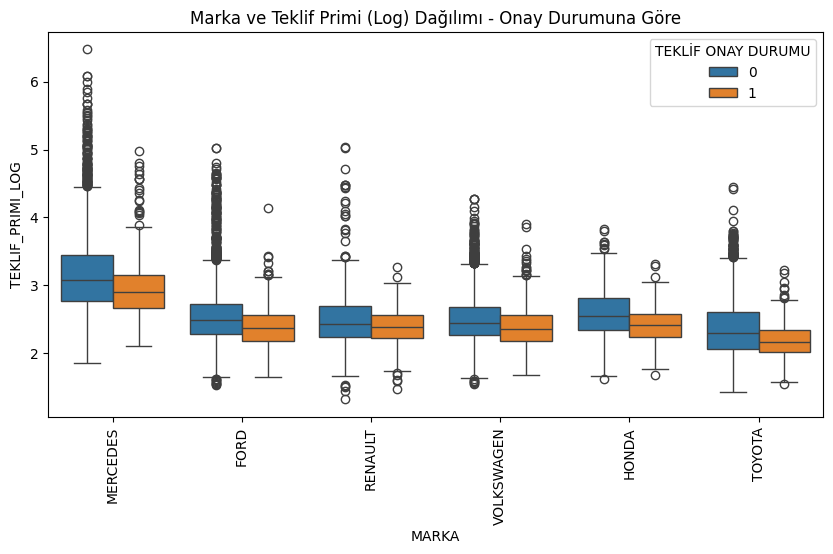

In [213]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df, 
    x="MARKA", 
    y="TEKLIF_PRIMI_LOG", 
    hue="TEKLİF ONAY DURUMU"
)
plt.xticks(rotation=90)
plt.title("Marka ve Teklif Primi (Log) Dağılımı - Onay Durumuna Göre")
plt.show()

Markalar Arası Farklar:
- Mercedes: Prim seviyeleri genel olarak daha yüksek, ama onaylananlarda da orta seviyelerde prim görülüyor. Yüksek primli Mercedes teklifleri büyük ölçüde reddedilmiş.
- Ford / Renault / Volkswagen / Toyota: Daha çok orta-alt primlerde kümelenmiş, onaylanan teklifler daha düşük primlerde yoğun.
- Honda: Benzer şekilde düşük primlerde onay olasılığı daha fazla.

Outlier (uç değer) farkı:
- Onaylanmayanlarda outlier (çok yüksek primler) çok fazla.
- Onaylananlarda üst limit daha dar (çoğunlukla belli bir prim bandının altında kalmış).

Marka Tek Başına Belirleyici mi?
- Buradan görüyoruz ki marka tek başına belirleyici değil. Ama markaya göre prim dağılımları farklılaşıyor.
- Örneğin Mercedes teklifleri diğer markalara göre daha yüksek primlerde toplanmış → bu da onay oranını olumsuz etkiliyor olabilir.